在 Python 中使用 MATLAB Image Labeler


匯入所需函示庫

In [1]:
import matlab.engine as eng 
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import torch
import torchvision 
import torchvision.utils as utils
from PIL import Image

建立與現有 MATLAB Session 連結

In [2]:
# 找到現有執行中的 MATLAB Session ID
# In MATLAB: matlab.engine.shareEngine
matlab_ID = eng.find_matlab()
print(matlab_ID)

# 選取欲建立連結的 MATLAB Session
sess = eng.connect_matlab(matlab_ID[0])
print(sess)

('MATLAB_12628',)


調用MATLAB中函式

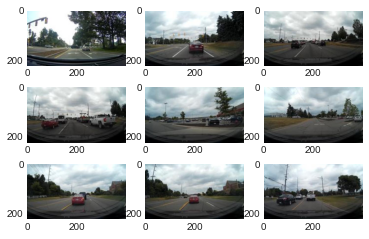

In [3]:
# 圖檔資料夾路徑
image_path = 'C:/Users/Tim/Desktop/terasoft/活動與研討會資料/MTK Day/Demo/Dataset/vehicleImages/'
ds = sess.imageDatastore(image_path)

# 預覽圖檔 (3x3)
style.use('seaborn-dark')
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    img = sess.read(ds)
    plt.imshow(img)



在 Python 中調用 MATLAB APP

In [4]:
sess.imageLabeler(ds,nargout=0) # Open with image dataset imported 

In [71]:
label_table = sess.workspace['gTruth']
out = sess.convertTorchBbox(label_table)    # Convert MATLAB format [xmin, ymin, w, h] -> Pytorch [xmin, ymin, xmax, ymax]
sess.workspace['gTruth'] = out
sess.saveToJSON(out, nargout=0)     # Save MATLAB table into json format file
BoundingBox_df = pd.read_json('BboxFromMATLAB.json')
print(BoundingBox_df)


Index(['imageFilename', 'Car'], dtype='object')


測試 Bounding Box 

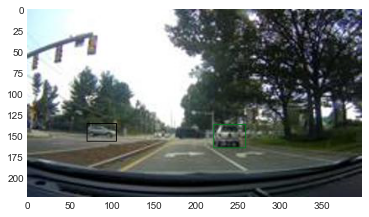

In [72]:
testImg = torchvision.io.read_image(BoundingBox_df['imageFilename'][0])
testImg_roi = utils.draw_bounding_boxes(testImg, torch.tensor(BoundingBox_df['Car'][0]))
plt.imshow(testImg_roi.permute(1,2,0))

In [5]:
# Terminate MATLAB session
sess.exit()